## 作業
在鐵達尼資料集中，
透過進階補值方法 KNN，將鐵達尼號中的 Titanic_train
.csv 中的 age 的遺失值進行補值。    
* step1: 觀察 Age 和 Pclass 與 Sex 是否有關連性?
* step2: 如果有關連性，運用 KNN ，取出 Age 、 Pclass、 Sex的資料，以 Sex 與 Pclass 補 Age 遺失值。 

In [1]:
# import library
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import math
import statistics
import seaborn as sns
from IPython.display import display

## 讀入資料

In [4]:
df = pd.read_csv("/Users/Apple/pyds/資料科學馬拉松/ML100Days/Example/Titanic_train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## 觀察 Age

In [35]:
dfn = df[["Age","Pclass","Sex"]]
dfn.head()

In [95]:
dfn.isnull().sum()

Age       177
Pclass      0
Sex         0
dtype: int64

In [36]:
dfn.replace({"male":0,"female":1},inplace=True)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/frame.py:4524: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


<AxesSubplot:xlabel='Age', ylabel='Pclass'>

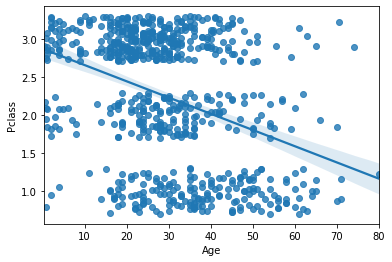

In [37]:
sns.regplot(x="Age",y="Pclass",data=dfn ,y_jitter=0.3)

<AxesSubplot:xlabel='Age', ylabel='Sex'>

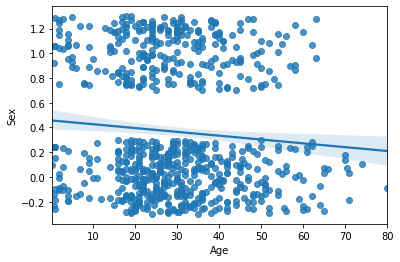

In [107]:
sns.regplot(x="Age",y="Sex",data=dfn ,y_jitter=0.3)

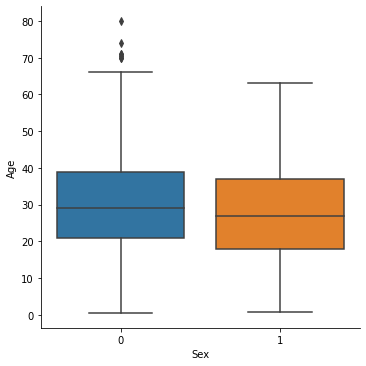

In [109]:
sns.catplot(x="Sex",y="Age",data=dfn ,kind="box" )

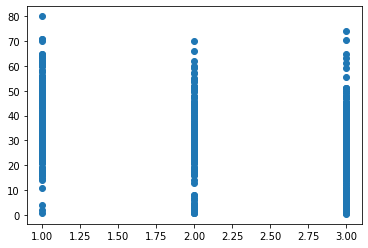

In [111]:
plt.scatter(dfn.Pclass,dfn.Age)

In [94]:
data = dfn.copy()
from sklearn.impute import KNNImputer
Imputer = KNNImputer(n_neighbors=3 ,weights="distance" )

df_filled = pd.DataFrame(Imputer.fit_transform(data))
df_filled.isnull().sum()
df_filled

,0,1,2
0,22.0,3.0,0.0
1,38.0,1.0,1.0
2,26.0,3.0,1.0
3,35.0,1.0,1.0
4,35.0,3.0,0.0
...,...,...,...
886,27.0,2.0,0.0
887,19.0,1.0,1.0
888,19.0,3.0,1.0
889,26.0,1.0,0.0


## MSE

In [83]:
#Step1:取無遺失值的資料集
completet_data = data.dropna()
completet_data.reset_index(inplace = True)
completet_data.drop(columns = "index",inplace=True)
print(completet_data)

      Age  Pclass  Sex
0    22.0       3    0
1    38.0       1    1
2    26.0       3    1
3    35.0       1    1
4    35.0       3    0
..    ...     ...  ...
709  39.0       3    1
710  27.0       2    0
711  19.0       1    1
712  26.0       1    0
713  32.0       3    0

[714 rows x 3 columns]


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [84]:
#* Step2:隨機取 100 個資料點，當作遺失值
import random

a = random.sample(list(completet_data.index),100)
missing_data=completet_data.copy()
missing_data['Age'].iloc[a]=np.nan

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [93]:
#Step3:以step2產生的遺失值進行補值
verify_impute = pd.DataFrame(Imputer.transform(missing_data))
verify_impute.isnull().sum()

,0,1,2
0,22.0,3.0,0.0
1,38.0,1.0,1.0
2,19.0,3.0,1.0
3,35.0,1.0,1.0
4,35.0,3.0,0.0
...,...,...,...
709,39.0,3.0,1.0
710,27.0,2.0,0.0
711,19.0,1.0,1.0
712,26.0,1.0,0.0


In [105]:
# Step4: 計算MSE看補值的效果，可以透過這一個方法，比較不同補植策略下 MSE 的大小。
from sklearn.metrics import mean_squared_error
y_true1 =completet_data.iloc[:,0]
y_pred1 =verify_impute.iloc[:,0]
MSE_h=mean_squared_error(y_true1, y_pred1)
print(MSE_h)

31.136461266728915
